# Latex tip

Use ```\left(\dots\right)``` to make big brackets.

$$
\left (\frac{\alpha+\beta + \int_0^{\infty}f(x)dx}{\gamma}\right)^2
$$

# Pandas dataframes

Pandas is one of the most popular Python libraries for data manipulation and fast math operations.
https://pandas.pydata.org/docs/user_guide/index.html

In [69]:
import pandas as pd
df = pd.DataFrame({'A': [1,2,3],'B':[4,5,6]}) #this is a datframe
df

,A,B
0,1,4
1,2,5
2,3,6


Now I'll make a dataframe out of a bunch of normal random variables.

In [6]:
from numpy import random
data = random.normal(size=(10,3))
df = pd.DataFrame(data,columns=('A','B',"C"))
df

,A,B,C
0,0.476200,0.414367,-0.499773
1,-0.249354,0.037142,1.009810
2,1.218093,0.927089,0.208748
3,0.600139,-0.403505,-0.787000
4,0.962305,0.059110,1.684862
5,0.243579,-0.790191,-0.989718
6,-0.467235,0.637809,-0.114923
7,-0.912973,-0.605670,-0.038221
8,-0.441938,0.619535,-0.089100
9,0.871164,0.933795,0.602784


Pandas lets us print out our dataframes nicely, perform column-wise calculations, add new colums and do calculations.

In [73]:
import numpy as np
df['expA'] = np.exp(df.A) 
df['ΔAB'] = df.A-df.B
print(df.mean())
df

A        2.000000
B        5.000000
expA    10.064292
ΔAB     -3.000000
dtype: float64


,A,B,expA,ΔAB
0,1,4,2.718282,-3
1,2,5,7.389056,-3
2,3,6,20.085537,-3


# Two mode example

Now we'll do some quick logit calculations. Suppose people are choosing between walking and taking the bus.

$$
        P_w = \frac{\exp(V_w)}{\exp(V_w)+\exp(V_b)} = \frac{1}{1+\exp(V_b-V_w)} = \frac{1}{1+\exp(-\Delta wb)},
$$
where $\Delta wb=V_w-V_b$.

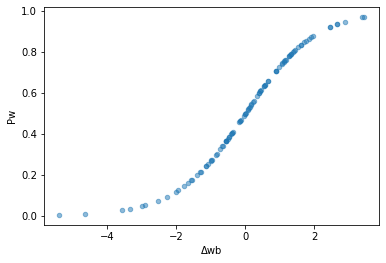

In [77]:
df = pd.DataFrame(random.laplace(scale=1,size=(100,2)),columns=('Vw','Vb'))
df['Pw'] = np.exp(df.Vw)/(np.exp(df.Vw)+np.exp(df.Vb))
df['Δwb'] = df.Vw - df.Vb
df.head()
df.plot(x='Δwb',y='Pw',kind='scatter',alpha=0.5)

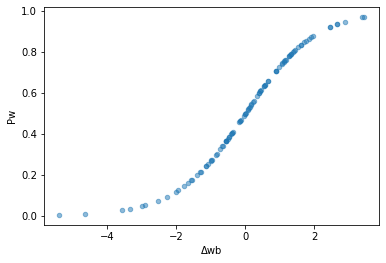

In [78]:
df.plot(x='Δwb',y='Pw',kind='scatter',alpha=0.5)

# Three mode example

Choose walking, taking the bus and driving.

$$
P_w = \frac{exp(V_w)}{\exp(V_w)+\exp(V_b) + \exp(V_d)} 
$$


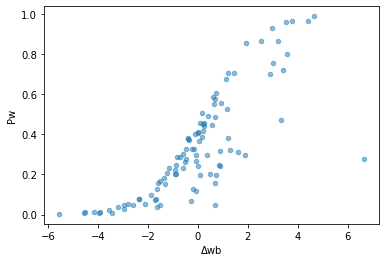

In [79]:
df = pd.DataFrame(random.laplace(scale=1,size=(100,3)),columns=('Vw','Vb','Vd'))
df['Pw'] = np.exp(df.Vw)/(np.exp(df.Vw)+np.exp(df.Vb)+np.exp(df.Vd))
df['Δwb'] = df.Vw - df.Vb
# this plot is no longer neatly along a line
df.plot(x='Δwb',y='Pw',kind='scatter',alpha=0.5)

# Deriving utilities for walk/bus model

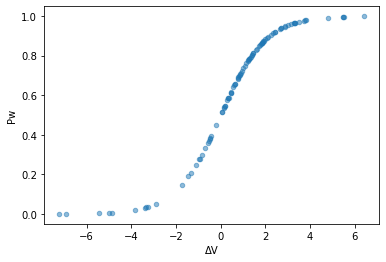

In [90]:
#T is travel time
βT = -2  #coefficient of travel time
βM = -1 #coeffiient of money cost
αB = -1 #alternative specific constant

# utilities for each mode
Vw = lambda T:  βT*T 
Vb = lambda T,M: αB + βT*T + βM*M  #αB is the 'alternative specific constant' for Bus

# now get the predicted probabilities
df = pd.DataFrame(
                random.gamma(1,scale=1,size=(100,3)) #initial data are just draws from a gamma distribution
                  ,columns=('Tb','Mb','Tw')
                 )
df['Tb'] = random.gamma(.5,size=(100,1)) #making the bus travel time lower by swapping with draws from a gamma w/ smaller mean
df['Vb'] = Vb(df.Tb,df.Mb)
df['Vw'] = Vw(df.Tw)
df['Pw'] = np.exp(df.Vw)/(np.exp(df.Vw)+np.exp(df.Vb))
df['ΔV'] = df.Vw-df.Vb
df.plot('ΔV','Pw',kind='scatter',alpha=0.5)

Now suppose each row above stands for a block in Champaign-Urbana, and each block has a different population.

In [91]:
df['BlockPop'] = random.uniform(low=150,high=250,size=(100,1)) #randomly generating the block populations
df['BlockWalk'] = df.Pw*df.BlockPop #calculating the number of people on each block who walk

In [92]:
#total number of people who we predict will walk
df.BlockWalk.sum()

13073.501243349645

# Running a function row-by-row

In [84]:
def f(row):
    return [row.Vw-row.Vb,row.Vb-row.Vw]
    
df2=df.apply(f,axis=1,result_type='expand')
df2.head()
df2.columns = ('A','B')
df2.head()

,A,B
0,0.323475,-0.323475
1,0.596628,-0.596628
2,3.996470,-3.996470
3,1.228602,-1.228602
4,1.264102,-1.264102


# Reading a dataframe from csv

Your jupyter notebook needs to be in the same folder as your csv.

In [ ]:
import pandas as pd
df = pd.read_csv('example_filename.csv')